# Rrefered from Kaggle.com (https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1)

Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
Missing Attribute Values: None

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import warnings

# information about the csv as refered from kaggle.com


# uploading haberman csv to a dataframe using pandas
df = pd.read_csv("D:\Machine Learning\EDA & data analysis\Assignemnt(data_vis)\haberman.csv")


1. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

In [2]:
print(df.shape)

# the shape implies we have 306 rows and 4 columns in our dataset. In general there are 306 points in the dataframe

(306, 4)


In [3]:
print(df.columns)

# We have 4 column labels as described below. There are 4 features for this dataframe.

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:

print(df['status'].value_counts())

# There are 2 classes 
#There are 225 patients who survived more than 5 years or longer and  81 patients survived less than 5 years

1    225
2     81
Name: status, dtype: int64


In [5]:
print(df.head(5))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


##### Objective is to classify the status according to the combination of features (age, year. nodes)
Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
Write your observations in english as crisply and unambigously as possible. Always quantify your results.

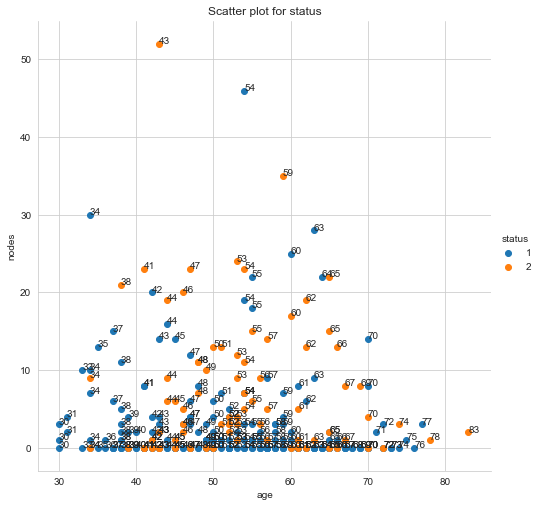

In [15]:
#2D scatter plot to analyze the relation between the features . Checking if it helps in classifying the status

sb.set_style("whitegrid");
sb.FacetGrid(df, hue="status",size=7)\
   .map(plt.scatter,"age", "nodes")\
   .add_legend();
   
plt.title("Scatter plot for status")

xl = df['age']
yl = df['nodes']

for x,y in zip(xl,yl): #zip merges the 2 values into one group
    
    label = "{:d}".format(x) # text to be displayed
    plt.annotate(label,(x,y))


warnings.filterwarnings("ignore",message="msg")

plt.show()

###### Observation:
    1. its difficult to distinguish the status with age and nodes

Text(0.5, 1.02, 'Pair Plot')

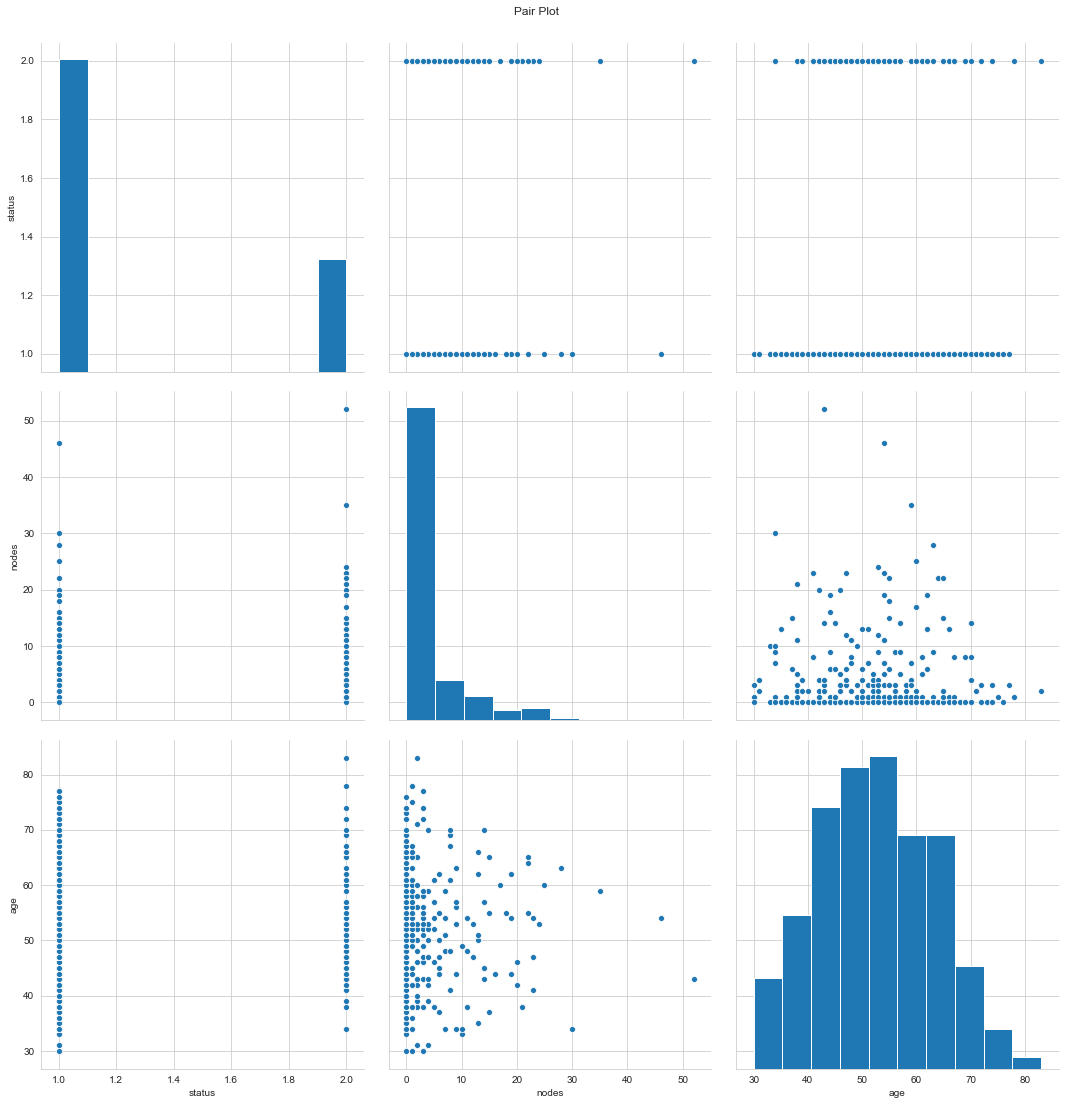

In [7]:


sb.set_style("whitegrid");
pplt = sb.pairplot(df, size=5, vars = ["status","nodes","age"]);

pplt.fig.suptitle('Pair Plot', y = 1.02) # title of the plot


###### Observation:
- We can only make out that the status is more concentrated between the nodes 0 to 20.  

Text(0.5, 1.02, 'Distribution Plot')

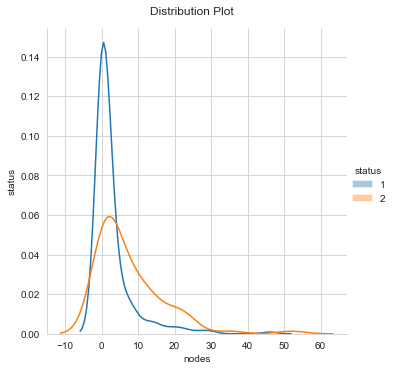

In [8]:
dist = sb.FacetGrid(df, hue="status", size=5) \
   .map(sb.distplot, "nodes","status") \
   .add_legend();

dist.fig.suptitle('Distribution Plot', y = 1.02) # title of the plot


Text(0.5, 1.02, 'Distribution Plot')

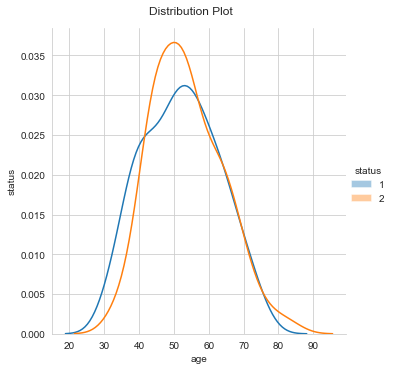

In [9]:
dist = sb.FacetGrid(df, hue="status", size=5) \
   .map(sb.distplot, "age", "status") \
   .add_legend();

dist.fig.suptitle('Distribution Plot', y = 1.02) # title of the plot

Text(0.5, 1.02, 'Distribution Plot')

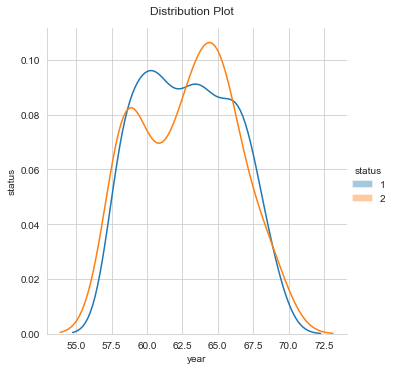

In [10]:
dist = sb.FacetGrid(df, hue="status", size=5) \
   .map(sb.distplot, "year", "status") \
   .add_legend();

dist.fig.suptitle('Distribution Plot', y = 1.02) # title of the plot

###### Observation:
    1. Higher number of nodes(greater than 10) can lead to higher risk and result in status 2.
    2. Classification of age and year to status is very difficult.

[0.70915033 0.08496732 0.0751634  0.03594771 0.02941176 0.01960784
 0.02614379 0.00326797 0.00653595 0.         0.00326797 0.
 0.         0.00326797 0.00326797]
[ 0.          3.46666667  6.93333333 10.4        13.86666667 17.33333333
 20.8        24.26666667 27.73333333 31.2        34.66666667 38.13333333
 41.6        45.06666667 48.53333333 52.        ]


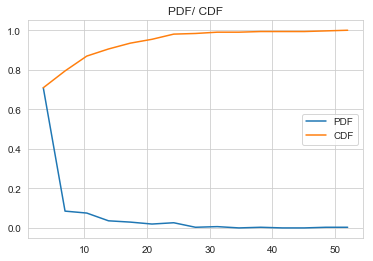

In [11]:
counts, bin_edges = np.histogram(df['nodes'], bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
pdf = plt.plot(bin_edges[1:],pdf)

cdf = plt.plot(bin_edges[1:], cdf)

plt.legend(("PDF","CDF"))
plt.title("PDF/ CDF")

plt.show();

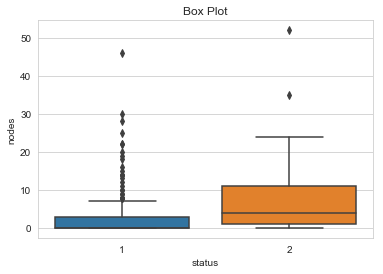

In [12]:
#boxplot
box = sb.boxplot(x='status',y='nodes', data=df).set_title("Box Plot")


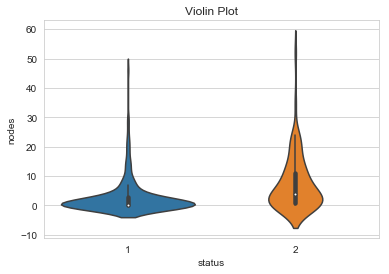

In [13]:
vp = sb.violinplot(x="status", y="nodes", data=df, size=8).set_title("Violin Plot")


###### Observation: 

The status of a person is 1 if the nodes aare between to 0 to  around 5

Text(0.5, 1.02, 'Contour Plot')

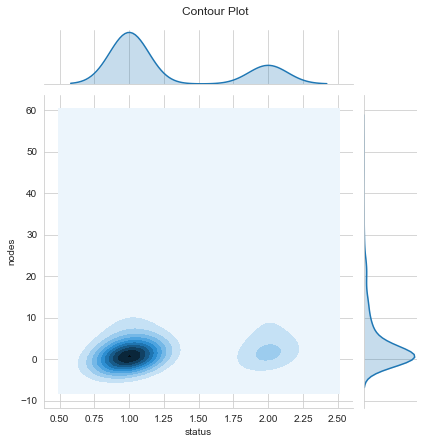

In [14]:
con = sb.jointplot(x="status", y="nodes", data=df, kind="kde")
con.fig.suptitle('Contour Plot', y = 1.02) # title of the plot


###### Observation:
    Contour plot also tells us the status of the person is likely to be one if the nodes are between 0 to 10

###### Conclusion:
    It is difficult to predict the status of the person based on the data but it is highly likely that a person would have a status 1 if the number of nodes are between 0 to 10
    else the status is likely to be 2